# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
arquivo = 'previsao_de_renda.csv'

In [4]:
df = pd.read_csv(arquivo)

In [5]:
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [11]:
# visualizando somente os dados das variáveis qualitativas

colunas = ['data_ref', 'sexo', 'tipo_renda', 'posse_de_imovel', 'educacao', 'estado_civil', 'tipo_residencia']
quant = df[colunas]
quant.head()

,data_ref,sexo,tipo_renda,posse_de_imovel,educacao,estado_civil,tipo_residencia
0,2015-01-01,F,Assalariado,True,Secundário,Casado,Casa
1,2015-01-01,M,Empresário,True,Secundário,Casado,Casa
2,2015-01-01,M,Assalariado,True,Superior completo,Casado,Casa
3,2015-01-01,F,Empresário,False,Secundário,Casado,Casa
4,2015-01-01,M,Assalariado,False,Secundário,Casado,Casa


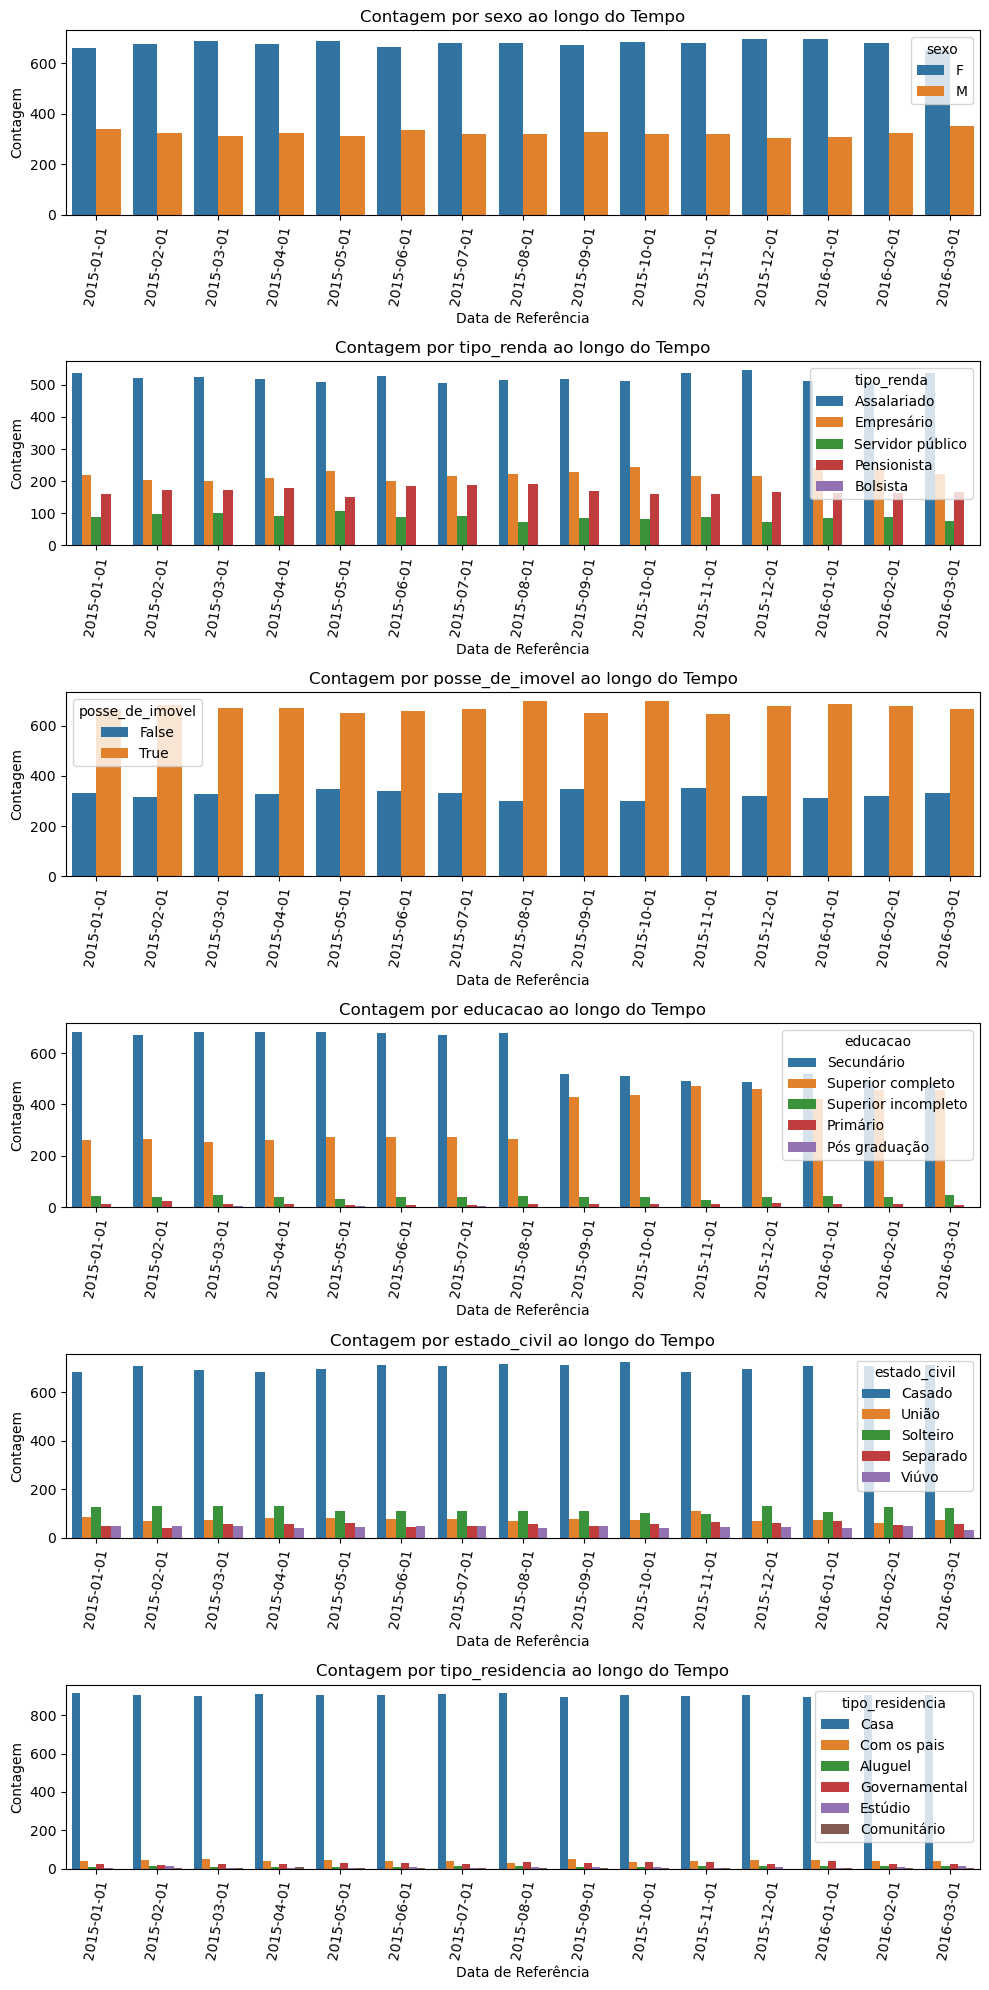

In [19]:
# variáveis a analisar
colunas_qualitativas = ['sexo', 'tipo_renda', 'posse_de_imovel', 'educacao', 'estado_civil', 'tipo_residencia']

plt.figure(figsize=(10, 20))

for i, coluna in enumerate(colunas_qualitativas, 1):
    plt.subplot(6, 1, i)
    sns.countplot(x='data_ref', hue=coluna, data=df)
    plt.title(f'Contagem por {coluna} ao longo do Tempo')
    plt.xlabel('Data de Referência')
    plt.ylabel('Contagem')
    plt.xticks(rotation=80)

plt.tight_layout()
plt.show()

### Alterações percebidas:

        - Foi possível perceber, a partir da leitura dos gráficos, somente a variação no nível de educação. Aumentou a quantidade de incidência de pessoas com ensino superior completo e reduziu a quantidade de pessoas com nível secundário. As duas barras, no gráfico, a partir de certa data, ficaram, praticamente, empatadas. 
        
        - Quanto aos outros valores, não foi possível verificar mudanças significativas. 

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

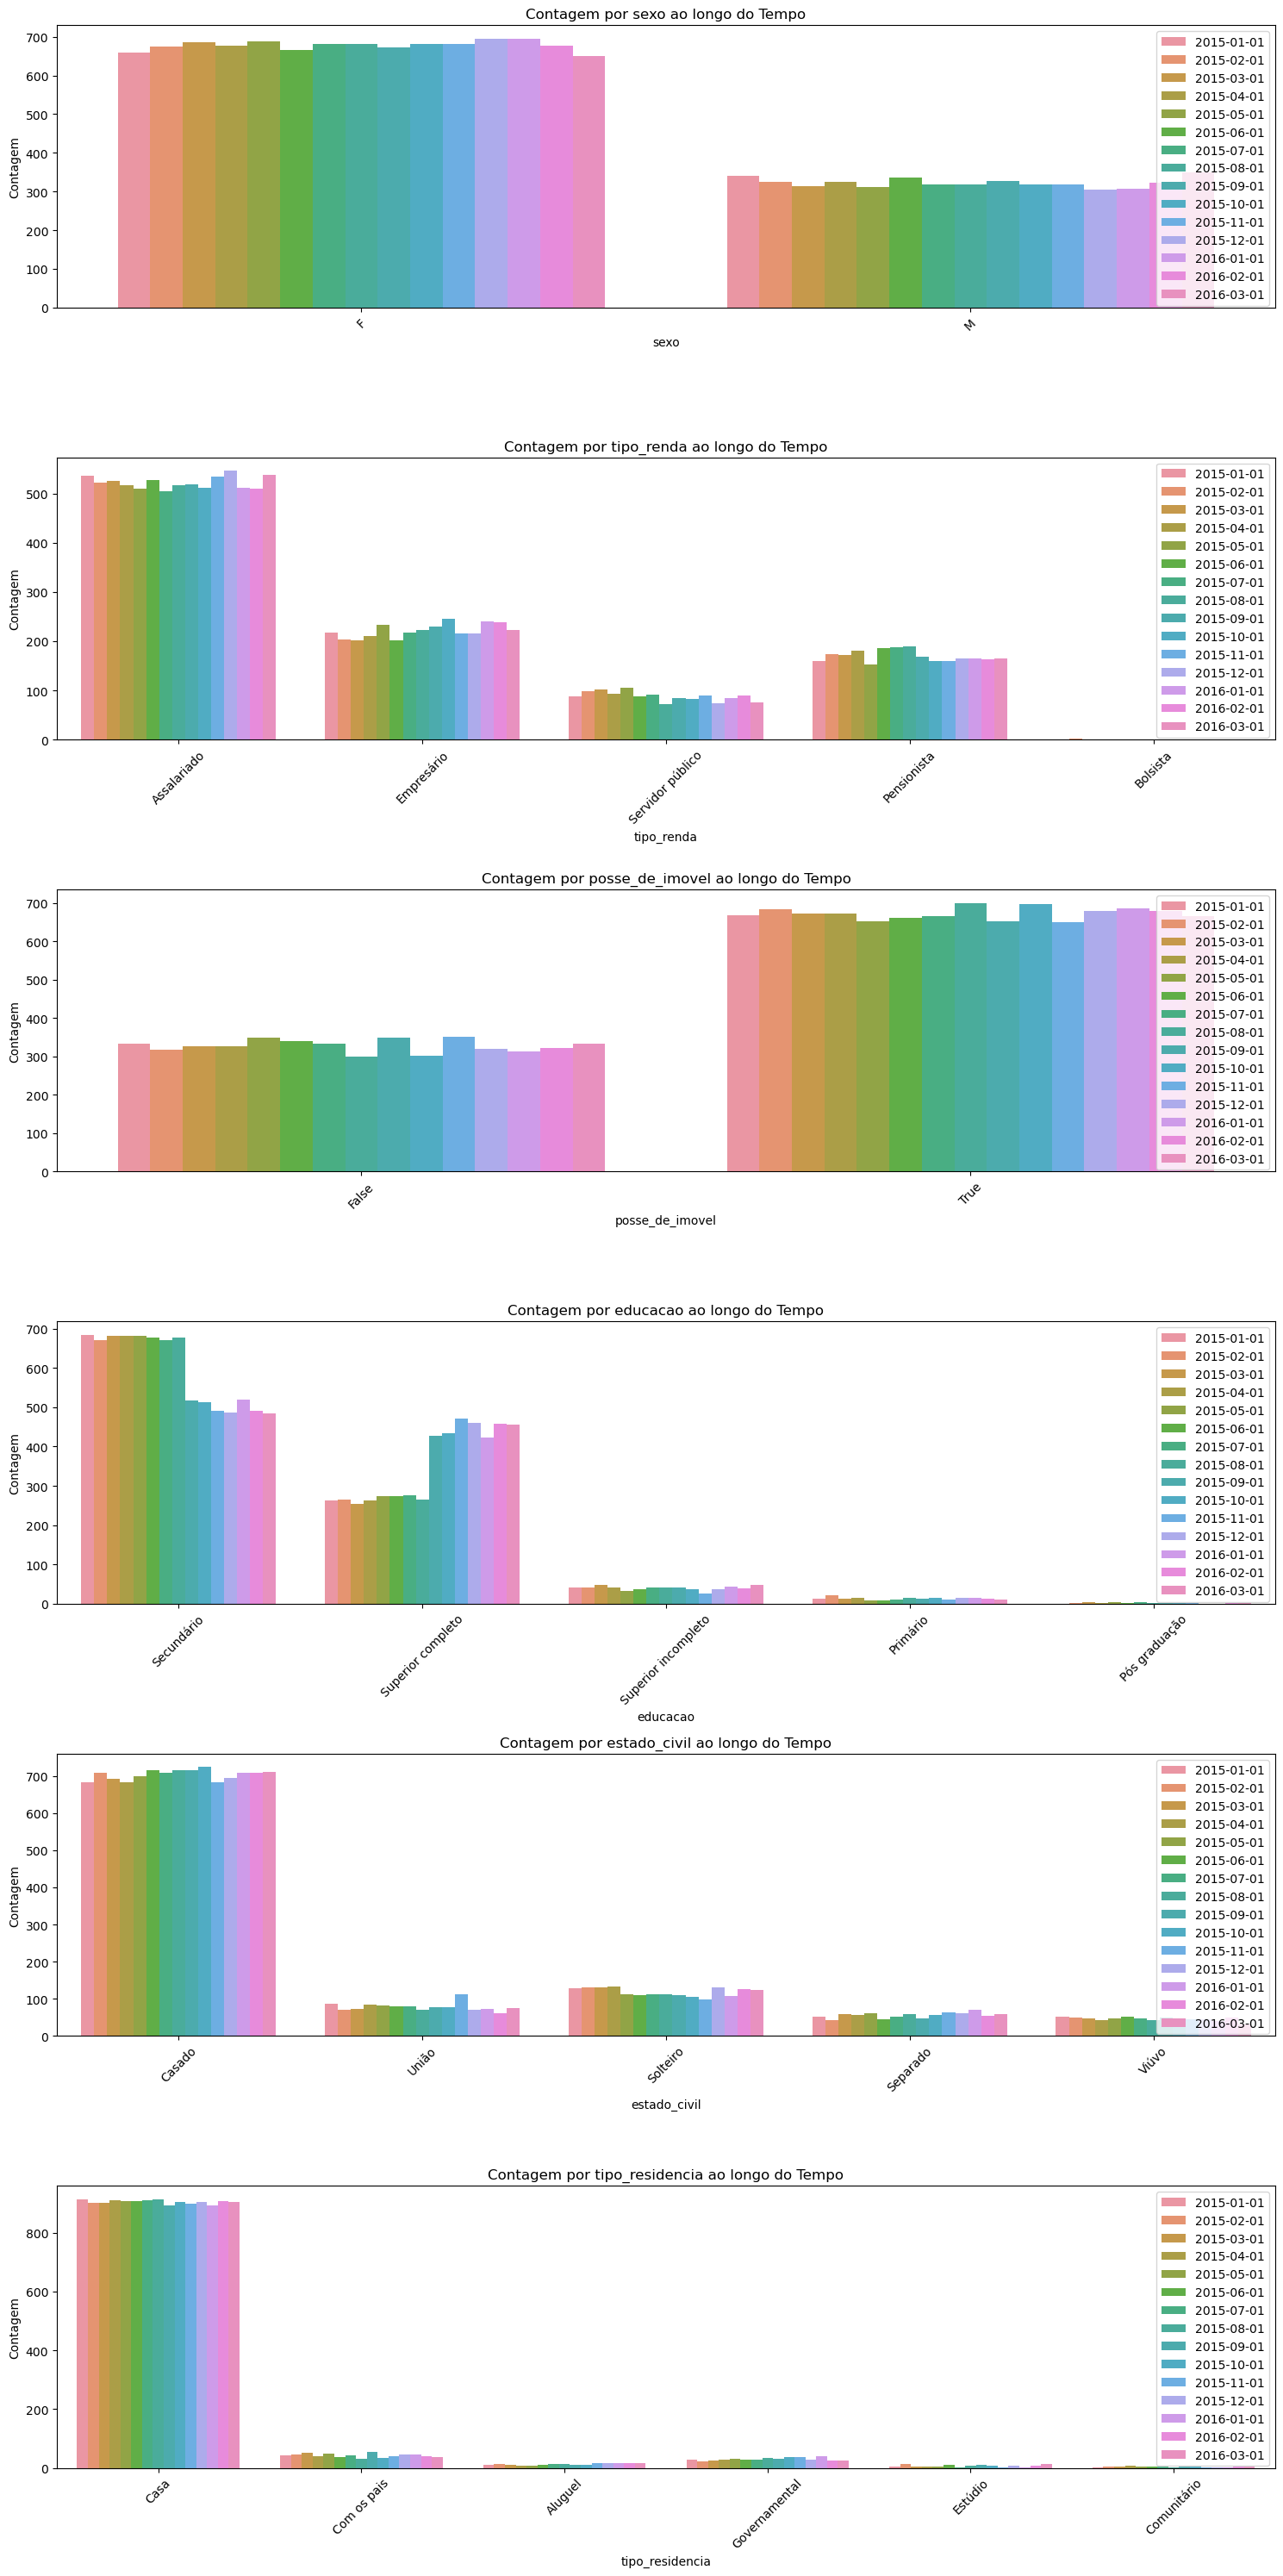

In [34]:
df_qualitativas = df[colunas_qualitativas]

# Configurar o tamanho do gráfico
plt.figure(figsize=(15, 30))

# Loop para plotar gráficos de barras das médias por categoria qualitativa
for i, coluna in enumerate(colunas_qualitativas[1:], 1):  # Começando do índice 1 para pular 'data_ref'
    plt.subplot(len(colunas_qualitativas)-1, 1, i)
    sns.countplot(x=coluna, hue='data_ref', data=df_qualitativas, dodge=True)
    plt.title(f'Contagem por {coluna} ao longo do Tempo')
    plt.xlabel(f'{coluna}')
    plt.ylabel('Contagem')
    plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor visualização
    plt.legend(loc='upper right')  # Posicionar a legenda no canto superior direito
    plt.tight_layout()

plt.show()


### Observações:

        - Como destacado, os dados estão bastante homogêneos, com uma estrutura estável. As únicas variáveis que sofreram alterações significativas no tempo foram: educação - secundária e superior.
        - Apesar de as diferenças entre os dados ao longo do tempo não serem destacáveis a olhos nus através de gráficos - a exeção do comentado acima -, os dados podem ser utilizados para a modelagem, tendo em vista que há nuances que devem ser monitoradas, quando comparadas entre si. 